In [1]:
import pandas as pd
brands=pd.read_csv("/Users/tsveti/Desktop/eniac-clean-data/brands.csv")
orderlines=pd.read_csv("/Users/tsveti/Desktop/eniac-clean-data/orderlines.csv")
orders=pd.read_csv("/Users/tsveti/Desktop/eniac-clean-data/orders.csv")
products=pd.read_csv("/Users/tsveti/Desktop/eniac-clean-data/products.csv")
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tsveti/Desktop/eniac-clean-data/brands.csv'

Question - How do seasonality and special dates (Christmas, Black Friday) affect sales?

In [2]:
orderlines_seasonallity=orderlines.copy()

In [3]:
orderlines_seasonallity["date"]=pd.to_datetime(orderlines["date"])

In [4]:
orderlines_seasonallity.sample(5)

,Unnamed: 0,id,id_order,product_id,product_quantity,sku,date,unit_price
183542,183542,1471208,453192,0,1,WDT0363,2017-12-01 13:01:55,136.80
251852,251852,1583304,499644,0,2,JBL0096,2018-01-27 14:51:57,23.99
213387,213387,1517514,472680,0,1,IFX0022,2017-12-26 23:11:04,29.44
288403,288403,1642363,524170,0,1,SAT0053,2018-03-09 21:38:43,75.99
272222,272222,1615315,512185,0,1,NTE0027,2018-02-15 18:34:16,10.99


In [5]:
orderlines_seasonallity

,Unnamed: 0,id,id_order,product_id,product_quantity,sku,date,unit_price
0,0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19,18.99
1,1,1119110,299540,0,1,LGE0043,2017-01-01 00:19:45,399.00
2,2,1119111,299541,0,1,PAR0071,2017-01-01 00:20:57,474.05
3,3,1119112,299542,0,1,WDT0315,2017-01-01 00:51:40,68.39
4,4,1119113,299543,0,1,JBL0104,2017-01-01 01:06:38,23.74
...,...,...,...,...,...,...,...,...
293978,293978,1650199,527398,0,1,JBL0122,2018-03-14 13:57:25,42.99
293979,293979,1650200,527399,0,1,PAC0653,2018-03-14 13:57:34,141.58
293980,293980,1650201,527400,0,2,APP0698,2018-03-14 13:57:41,9.99
293981,293981,1650202,527388,0,1,BEZ0204,2018-03-14 13:58:01,19.99


In [11]:
orderlines_seasonallity["month"]=orderlines_seasonallity["date"].dt.strftime('%B')

In [12]:
orderlines_seasonallity["day_of_week"]=orderlines_seasonallity["date"].dt.strftime('%A')

In [13]:
orderlines_seasonallity["sales"]=orderlines_seasonallity["product_quantity"] * orderlines_seasonallity["unit_price"]

In [14]:
orderlines_seasonallity

,Unnamed: 0,id,id_order,product_id,product_quantity,sku,date,unit_price,month,day_of_week,sales
0,0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19,18.99,January,Sunday,18.99
1,1,1119110,299540,0,1,LGE0043,2017-01-01 00:19:45,399.00,January,Sunday,399.00
2,2,1119111,299541,0,1,PAR0071,2017-01-01 00:20:57,474.05,January,Sunday,474.05
3,3,1119112,299542,0,1,WDT0315,2017-01-01 00:51:40,68.39,January,Sunday,68.39
4,4,1119113,299543,0,1,JBL0104,2017-01-01 01:06:38,23.74,January,Sunday,23.74
...,...,...,...,...,...,...,...,...,...,...,...
293978,293978,1650199,527398,0,1,JBL0122,2018-03-14 13:57:25,42.99,March,Wednesday,42.99
293979,293979,1650200,527399,0,1,PAC0653,2018-03-14 13:57:34,141.58,March,Wednesday,141.58
293980,293980,1650201,527400,0,2,APP0698,2018-03-14 13:57:41,9.99,March,Wednesday,19.98
293981,293981,1650202,527388,0,1,BEZ0204,2018-03-14 13:58:01,19.99,March,Wednesday,19.99


In [16]:
new_table=orderlines_seasonallity.groupby("month").agg({"sales" : "sum"})

In [17]:
new_table

,sales
month,
April,4317992.19
August,4346297.88
December,17918893.30
February,15194608.88
January,26700962.64
July,5949207.55
June,5427134.45
March,12215168.03
May,4154954.31


<Axes: xlabel='sales', ylabel='month'>

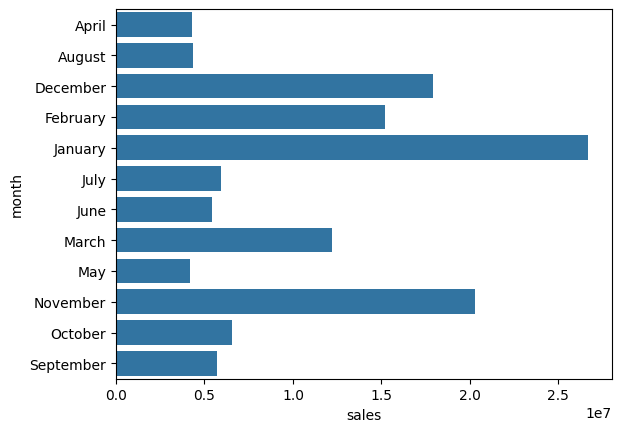

In [18]:
sns.barplot(data=new_table, x="sales", y="month")

In [19]:
orderlines_seasonallity.head(3)

,Unnamed: 0,id,id_order,product_id,product_quantity,sku,date,unit_price,month,day_of_week,sales
0,0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19,18.99,January,Sunday,18.99
1,1,1119110,299540,0,1,LGE0043,2017-01-01 00:19:45,399.00,January,Sunday,399.00
2,2,1119111,299541,0,1,PAR0071,2017-01-01 00:20:57,474.05,January,Sunday,474.05


In [20]:
orders_completed=orders.copy()

In [21]:
orders_completed

,Unnamed: 0,order_id,created_date,total_paid,state
0,0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,1,241423,2017-11-06 13:10:02,136.15,Completed
2,2,242832,2017-12-31 17:40:03,15.76,Completed
3,3,243330,2017-02-16 10:59:38,84.98,Completed
4,4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...,...
226899,226904,527397,2018-03-14 13:56:38,42.99,Place Order
226900,226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226901,226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226902,226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [22]:
orders_completed=orders_completed.loc[orders_completed["state"] == "Completed"]

In [23]:
murry=orderlines_seasonallity.copy()

In [24]:
murry

,Unnamed: 0,id,id_order,product_id,product_quantity,sku,date,unit_price,month,day_of_week,sales
0,0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19,18.99,January,Sunday,18.99
1,1,1119110,299540,0,1,LGE0043,2017-01-01 00:19:45,399.00,January,Sunday,399.00
2,2,1119111,299541,0,1,PAR0071,2017-01-01 00:20:57,474.05,January,Sunday,474.05
3,3,1119112,299542,0,1,WDT0315,2017-01-01 00:51:40,68.39,January,Sunday,68.39
4,4,1119113,299543,0,1,JBL0104,2017-01-01 01:06:38,23.74,January,Sunday,23.74
...,...,...,...,...,...,...,...,...,...,...,...
293978,293978,1650199,527398,0,1,JBL0122,2018-03-14 13:57:25,42.99,March,Wednesday,42.99
293979,293979,1650200,527399,0,1,PAC0653,2018-03-14 13:57:34,141.58,March,Wednesday,141.58
293980,293980,1650201,527400,0,2,APP0698,2018-03-14 13:57:41,9.99,March,Wednesday,19.98
293981,293981,1650202,527388,0,1,BEZ0204,2018-03-14 13:58:01,19.99,March,Wednesday,19.99


In [25]:
kuri=murry.merge(
    orders_completed, 
    how="inner", 
    left_on="id_order", 
    right_on="order_id"
)

In [26]:
kuri.head(4)

,Unnamed: 0_x,id,id_order,product_id,product_quantity,sku,date,unit_price,month,day_of_week,sales,Unnamed: 0_y,order_id,created_date,total_paid,state
0,7,1119116,299545,0,1,OWC0100,2017-01-01 01:46:16,47.49,January,Sunday,47.49,207,299545,2017-01-01 01:51:47,51.48,Completed
1,8,1119119,299546,0,1,IOT0014,2017-01-01 01:50:34,18.99,January,Sunday,18.99,208,299546,2017-01-01 01:57:34,18.99,Completed
2,9,1119120,295347,0,1,APP0700,2017-01-01 01:54:11,72.19,January,Sunday,72.19,147,295347,2017-01-01 02:02:38,72.19,Completed
3,11,1119126,299549,0,1,PAC0929,2017-01-01 02:07:42,2565.99,January,Sunday,2565.99,210,299549,2017-01-02 10:00:20,2565.99,Completed


In [27]:
kori=kuri.groupby("month").agg({"sales" : "sum"})

<Axes: xlabel='month', ylabel='sales'>

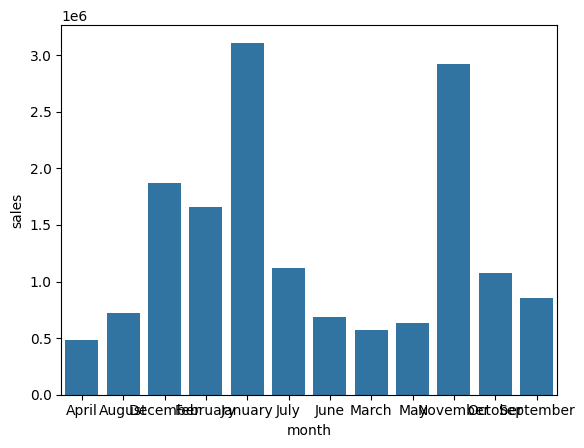

In [28]:
sns.barplot(data=kori, x="month", y="sales")

In [29]:
kori

,sales
month,
April,486537.69
August,719480.19
December,1868411.19
February,1657735.21
January,3109403.77
July,1118228.23
June,689047.41
March,573877.86
May,630672.23


In [30]:
kuri["year"]=kuri["date"].dt.year

In [31]:
kuri["year"]=pd.to_datetime(kuri["year"])

In [32]:
kuri.groupby(["month", "year"]).agg({"sales" : "sum"})

sales
month     year                                    
April     1970-01-01 00:00:00.000002017  486537.69
August    1970-01-01 00:00:00.000002017  719480.19
December  1970-01-01 00:00:00.000002017 1868411.19
February  1970-01-01 00:00:00.000002017  607088.37
          1970-01-01 00:00:00.000002018 1050646.84
January   1970-01-01 00:00:00.000002017 1175631.77
          1970-01-01 00:00:00.000002018 1933772.00
July      1970-01-01 00:00:00.000002017 1118228.23
June      1970-01-01 00:00:00.000002017  689047.41
March     1970-01-01 00:00:00.000002017  117009.39
          1970-01-01 00:00:00.000002018  456868.47
May       1970-01-01 00:00:00.000002017  630672.23
November  1970-01-01 00:00:00.000002017 2924097.02
October   1970-01-01 00:00:00.000002017 1074082.18
September 1970-01-01 00:00:00.000002017  858131.84

In [33]:
kuri["year"]=pd.to_numeric(kuri["year"])

In [34]:
kuri.dtypes

Unnamed: 0_x                 int64
id                           int64
id_order                     int64
product_id                   int64
product_quantity             int64
sku                         object
date                datetime64[ns]
unit_price                 float64
month                       object
day_of_week                 object
sales                      float64
Unnamed: 0_y                 int64
order_id                     int64
created_date                object
total_paid                 float64
state                       object
year                         int64
dtype: object

In [35]:
kuri.sample(4)

,Unnamed: 0_x,id,id_order,product_id,product_quantity,sku,date,unit_price,month,day_of_week,sales,Unnamed: 0_y,order_id,created_date,total_paid,state,year
22668,103048,1315458,388241,0,1,TUC0335,2017-08-10 13:13:14,14.99,August,Thursday,14.99,88662,388241,2017-08-10 13:15:02,21.98,Completed,2017
46474,210643,1512515,470274,0,1,PAC2477,2017-12-23 15:15:22,19.99,December,Saturday,19.99,169902,470274,2017-12-23 15:20:40,26.98,Completed,2017
49615,221533,1533414,480051,0,1,FIB0008,2018-01-02 18:07:02,59.99,January,Tuesday,59.99,179658,480051,2018-01-02 18:17:10,119.98,Completed,2018
2846,9604,1143462,308312,0,1,CRU0032,2017-01-12 23:11:25,59.99,January,Thursday,59.99,8841,308312,2017-01-12 23:20:40,59.99,Completed,2017


In [36]:
az=kuri.groupby(['month', 'year']).agg({'sales': 'sum'}).reset_index()

In [37]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

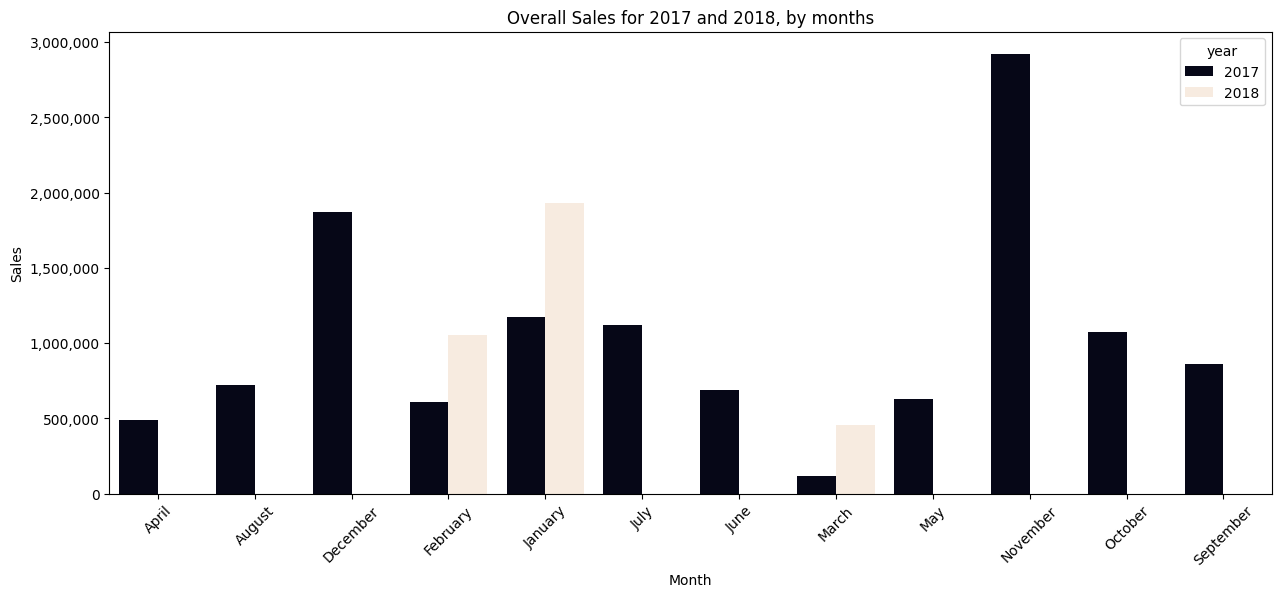

In [38]:
fig, ax =plt.subplots(figsize=(15,6))
new_plot=sns.barplot(x="month", y="sales", hue="year", data=az,palette="rocket");
plt.xticks(rotation=45)
plt.title('Overall Sales for 2017 and 2018, by months')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


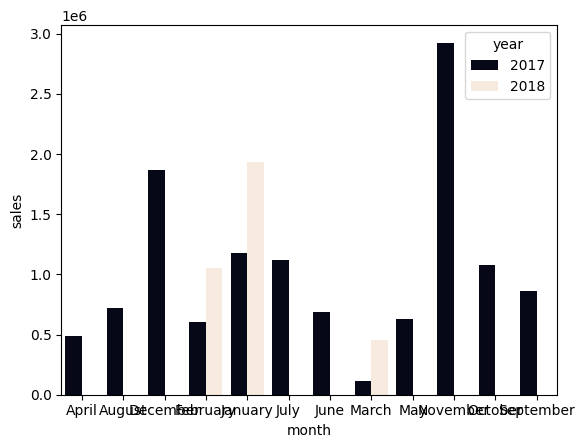

In [39]:
new_plot=sns.barplot(x="month", y="sales", hue="year", data=az,palette="rocket");